<a href="https://colab.research.google.com/github/zhou1126/Marquette_teaching_finance/blob/main/Taiwan_bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

# Specify the target folder
# target_folder = "/workspaces/Marquette_teaching_finance/"

fedesoriano_company_bankruptcy_prediction_path = kagglehub.dataset_download('fedesoriano/company-bankruptcy-prediction')

print('Data source import complete.')


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/codespace/.cache/kagglehub/datasets/fedesoriano/company-bankruptcy-prediction/versions/2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/codespace/.cache/kagglehub/datasets/fedesoriano/company-bankruptcy-prediction/versions/2/data.csv


In [4]:
fedesoriano_company_bankruptcy_prediction_path

'/home/codespace/.cache/kagglehub/datasets/fedesoriano/company-bankruptcy-prediction/versions/2'

In [5]:
df = pd.read_csv('/home/codespace/.cache/kagglehub/datasets/fedesoriano/company-bankruptcy-prediction/versions/2/data.csv')
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [6]:
df = pd.read_csv('/home/codespace/.cache/kagglehub/datasets/fedesoriano/company-bankruptcy-prediction/versions/2/data.csv')
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()
df.head()

# Profitability: Operating Gross Margin
# Liquidity: Current Ratio
# Leverage: 'Total debt/Total net worth'
# Efficiency: 'Total Asset Turnover'
# Cash flow: 'Cash Flow to Total Assets'
# Growth: 'Operating Profit Growth Rate'

df = df[['Bankrupt?', 'Operating Gross Margin', 'Current Ratio', 'Total debt/Total net worth', 'Total Asset Turnover', 'Cash Flow to Total Assets', 'Operating Profit Growth Rate']]
df = df.dropna()
print(f'df has {df.shape[0]} rows')


percentile_05 = df[['Operating Gross Margin', 'Current Ratio', 'Total debt/Total net worth', 'Total Asset Turnover', 'Cash Flow to Total Assets', 'Operating Profit Growth Rate']].quantile(0.05)
percentile_95 = df[['Operating Gross Margin', 'Current Ratio', 'Total debt/Total net worth', 'Total Asset Turnover', 'Cash Flow to Total Assets', 'Operating Profit Growth Rate']].quantile(0.95)

# Filter data to keep values within 10th and 90th percentiles for each column
filtered_df = df[
    (df[['Operating Gross Margin', 'Current Ratio', 'Total debt/Total net worth', 'Total Asset Turnover', 'Cash Flow to Total Assets', 'Operating Profit Growth Rate']] >= percentile_05).all(axis=1) &
    (df[['Operating Gross Margin', 'Current Ratio', 'Total debt/Total net worth', 'Total Asset Turnover', 'Cash Flow to Total Assets', 'Operating Profit Growth Rate']] <= percentile_95).all(axis=1)
]

print(f'filtered_df has {filtered_df.shape[0]} rows')


df has 6819 rows
filtered_df has 4208 rows


In [7]:
filtered_df.head()

,Bankrupt?,Operating Gross Margin,Current Ratio,Total debt/Total net worth,Total Asset Turnover,Cash Flow to Total Assets,Operating Profit Growth Rate
1,1,0.610235,0.006016,0.012502,0.064468,0.641100,0.848088
4,1,0.598783,0.006022,0.005150,0.175412,0.622374,0.848258
7,0,0.601738,0.009657,0.005278,0.218891,0.641553,0.848082
8,0,0.603612,0.013499,0.002266,0.154423,0.649869,0.848159
10,0,0.614026,0.006097,0.004933,0.076462,0.642950,0.848238


In [8]:
percentile_05, percentile_95

(Operating Gross Margin          0.593996
 Current Ratio                   0.004424
 Total debt/Total net worth      0.001139
 Total Asset Turnover            0.034483
 Cash Flow to Total Assets       0.587515
 Operating Profit Growth Rate    0.847722
 Name: 0.05, dtype: float64,
 Operating Gross Margin          0.630395
 Current Ratio                   0.037407
 Total debt/Total net worth      0.019955
 Total Asset Turnover            0.331484
 Cash Flow to Total Assets       0.729248
 Operating Profit Growth Rate    0.848560
 Name: 0.95, dtype: float64)

In [9]:
grouped_averages = filtered_df.groupby("Bankrupt?").median()

# Display the grouped averages
grouped_averages.head()

,Operating Gross Margin,Current Ratio,Total debt/Total net worth,Total Asset Turnover,Cash Flow to Total Assets,Operating Profit Growth Rate
Bankrupt?,,,,,,
0,0.606365,0.010616,0.005478,0.125187,0.645931,0.848044
1,0.601443,0.007470,0.012668,0.102699,0.639201,0.848015


In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4208 entries, 1 to 6815
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Bankrupt?                     4208 non-null   int64  
 1   Operating Gross Margin        4208 non-null   float64
 2   Current Ratio                 4208 non-null   float64
 3   Total debt/Total net worth    4208 non-null   float64
 4   Total Asset Turnover          4208 non-null   float64
 5   Cash Flow to Total Assets     4208 non-null   float64
 6   Operating Profit Growth Rate  4208 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 263.0 KB


In [11]:
filtered_df.columns

Index(['Bankrupt?', 'Operating Gross Margin', 'Current Ratio',
       'Total debt/Total net worth', 'Total Asset Turnover',
       'Cash Flow to Total Assets', 'Operating Profit Growth Rate'],
      dtype='object')

# Cluster Analysis

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

columns_for_clustering = ['Operating Gross Margin', 'Current Ratio', 'Total debt/Total net worth', 'Total Asset Turnover', 'Cash Flow to Total Assets', 'Operating Profit Growth Rate']
X = filtered_df[columns_for_clustering]


In [13]:
X.head()

,Operating Gross Margin,Current Ratio,Total debt/Total net worth,Total Asset Turnover,Cash Flow to Total Assets,Operating Profit Growth Rate
1,0.610235,0.006016,0.012502,0.064468,0.641100,0.848088
4,0.598783,0.006022,0.005150,0.175412,0.622374,0.848258
7,0.601738,0.009657,0.005278,0.218891,0.641553,0.848082
8,0.603612,0.013499,0.002266,0.154423,0.649869,0.848159
10,0.614026,0.006097,0.004933,0.076462,0.642950,0.848238


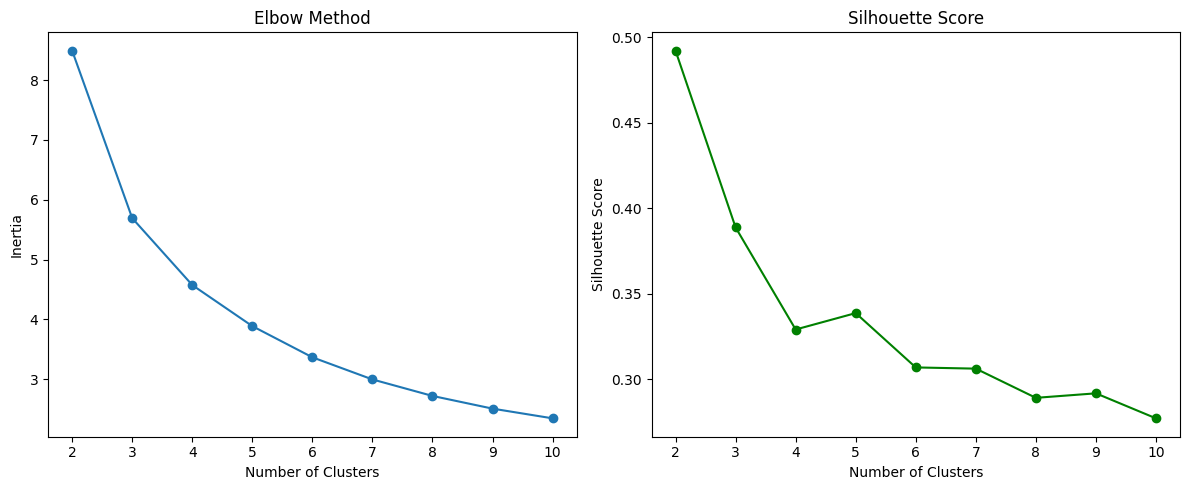

In [14]:
# Elbow Method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Test for 2 to 10 clusters

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=20).fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Inertia and Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Elbow Method Plot (Inertia vs. Number of Clusters):
# Look for the "elbow," which is the point where the decrease in inertia slows down significantly. This suggests the optimal number of clusters.

# Silhouette Score Plot (Silhouette Score vs. Number of Clusters):
# The peak value of the Silhouette Score indicates the best number of clusters, as it represents the best separation and compactness of the clusters.

# Looks 6 is a good number of clusters

In [15]:
optimal_clusters = 2

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=20).fit(X)
X['Cluster'] = kmeans.labels_

# Append "Bankrupt?" column to analyze
X['Bankrupt?'] = df['Bankrupt?']

# Analyze each cluster
cluster_analysis = X.groupby('Cluster').mean()
cluster_analysis['Record Count'] = X['Cluster'].value_counts().sort_index()

print("Cluster Analysis (Means and Record Counts):\n", cluster_analysis)

Cluster Analysis (Means and Record Counts):
          Operating Gross Margin  Current Ratio  Total debt/Total net worth  \
Cluster                                                                      
0                      0.608518       0.012258                    0.006066   
1                      0.605826       0.012526                    0.007187   

         Total Asset Turnover  Cash Flow to Total Assets  \
Cluster                                                    
0                    0.099910                   0.647227   
1                    0.209869                   0.652256   

         Operating Profit Growth Rate  Bankrupt?  Record Count  
Cluster                                                         
0                            0.848053   0.017199          2849  
1                            0.848076   0.009566          1359  


In [16]:
cluster_analysis

,Operating Gross Margin,Current Ratio,Total debt/Total net worth,Total Asset Turnover,Cash Flow to Total Assets,Operating Profit Growth Rate,Bankrupt?,Record Count
Cluster,,,,,,,,
0,0.608518,0.012258,0.006066,0.099910,0.647227,0.848053,0.017199,2849
1,0.605826,0.012526,0.007187,0.209869,0.652256,0.848076,0.009566,1359


In [17]:
cluster_analysis

,Operating Gross Margin,Current Ratio,Total debt/Total net worth,Total Asset Turnover,Cash Flow to Total Assets,Operating Profit Growth Rate,Bankrupt?,Record Count
Cluster,,,,,,,,
0,0.608518,0.012258,0.006066,0.099910,0.647227,0.848053,0.017199,2849
1,0.605826,0.012526,0.007187,0.209869,0.652256,0.848076,0.009566,1359


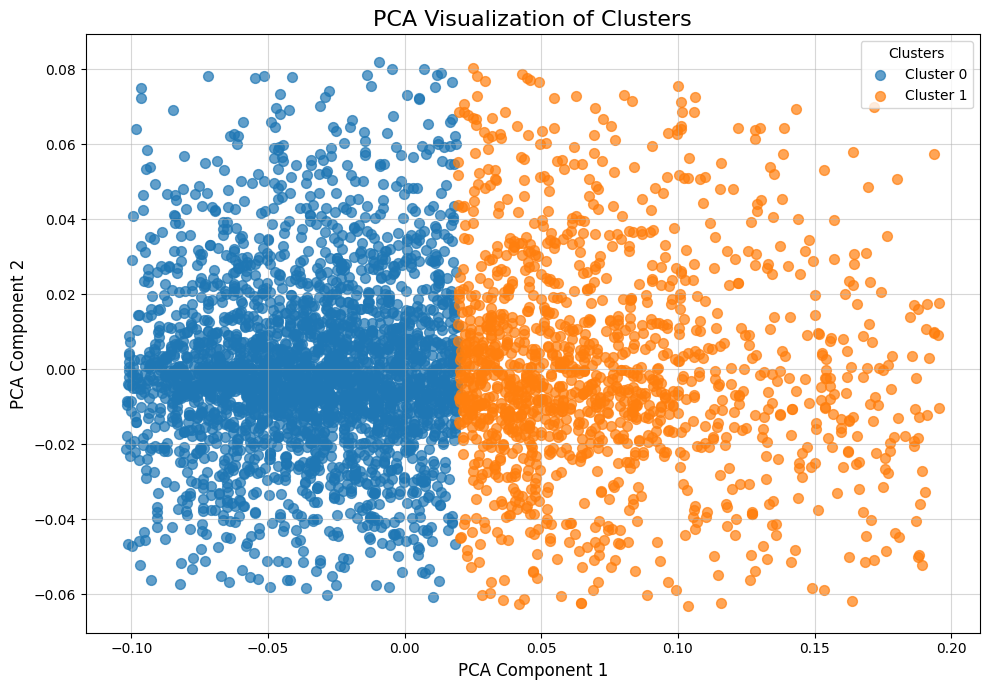

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Columns to use for PCA
pca_columns = ['Operating Gross Margin', 'Current Ratio', 'Total debt/Total net worth',
               'Total Asset Turnover', 'Cash Flow to Total Assets', 'Operating Profit Growth Rate']

# Perform PCA
pca = PCA(n_components=2, random_state=42)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(X[pca_columns])

# Add PCA results and cluster labels to the DataFrame
X['PCA1'] = pca_result[:, 0]
X['PCA2'] = pca_result[:, 1]

# Plot the PCA results, colored by cluster
plt.figure(figsize=(10, 7))
for cluster_label in X['Cluster'].unique():
    cluster_data = X[X['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_label}', s=50, alpha=0.7)

# Add labels and title
plt.title('PCA Visualization of Clusters', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Clusters')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [19]:
X.head()

,Operating Gross Margin,Current Ratio,Total debt/Total net worth,Total Asset Turnover,Cash Flow to Total Assets,Operating Profit Growth Rate,Cluster,Bankrupt?,PCA1,PCA2
1,0.610235,0.006016,0.012502,0.064468,0.641100,0.848088,0,1,-0.071223,-0.005151
4,0.598783,0.006022,0.005150,0.175412,0.622374,0.848258,1,1,0.039007,-0.028703
7,0.601738,0.009657,0.005278,0.218891,0.641553,0.848082,1,0,0.083178,-0.011014
8,0.603612,0.013499,0.002266,0.154423,0.649869,0.848159,0,0,0.019076,0.000176
10,0.614026,0.006097,0.004933,0.076462,0.642950,0.848238,0,0,-0.059318,-0.003491


### Try a Logistic Regression Model

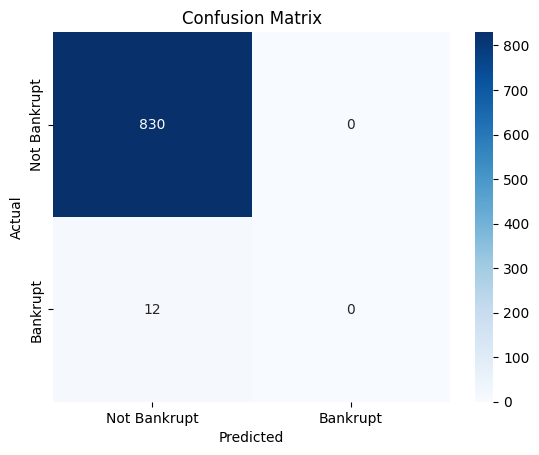

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       830
           1       0.00      0.00      0.00        12

    accuracy                           0.99       842
   macro avg       0.49      0.50      0.50       842
weighted avg       0.97      0.99      0.98       842

Accuracy: 0.9857482185273159
AUC: 0.6078313253012049


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


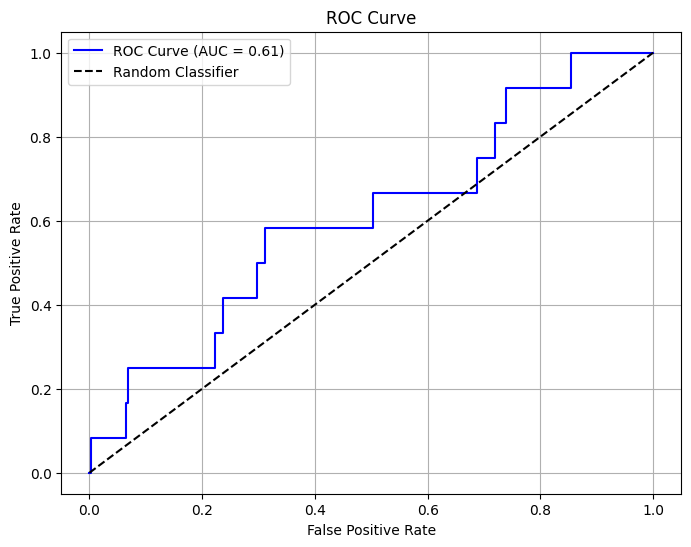

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# selected_features = [" Current Liability to Current Assets"]
selected_features = filtered_df.columns.drop("Bankrupt?")
target = "Bankrupt?"

# Features and target
X = filtered_df[selected_features]
y = filtered_df[target]

# Split data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()


# Enhance the model

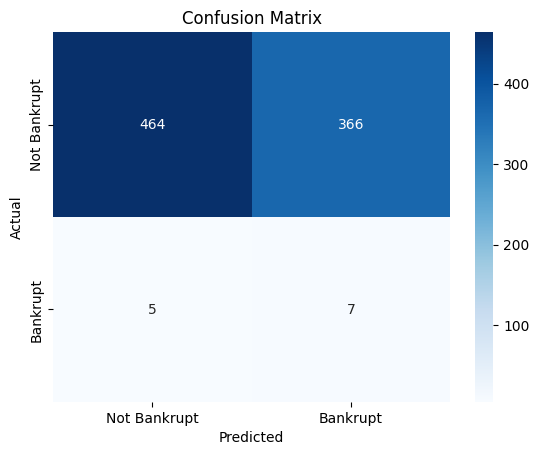

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.56      0.71       830
           1       0.02      0.58      0.04        12

    accuracy                           0.56       842
   macro avg       0.50      0.57      0.38       842
weighted avg       0.98      0.56      0.70       842

Accuracy: 0.5593824228028503
AUC: 0.6879518072289157


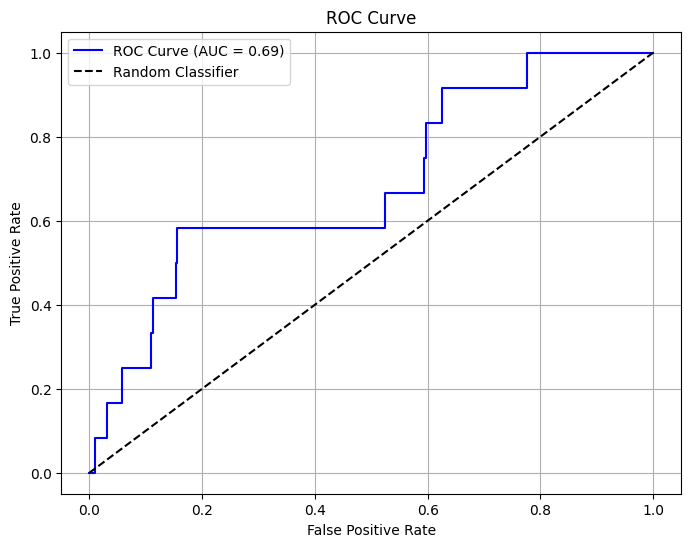

In [21]:
from imblearn.over_sampling import SMOTE

# Oversampling Minority Class

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Generate predictions and probabilities
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

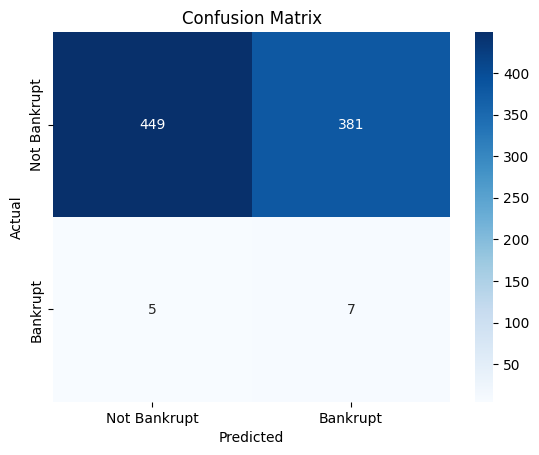

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.54      0.70       830
           1       0.02      0.58      0.04        12

    accuracy                           0.54       842
   macro avg       0.50      0.56      0.37       842
weighted avg       0.98      0.54      0.69       842

Accuracy: 0.5415676959619953
AUC: 0.6480923694779117


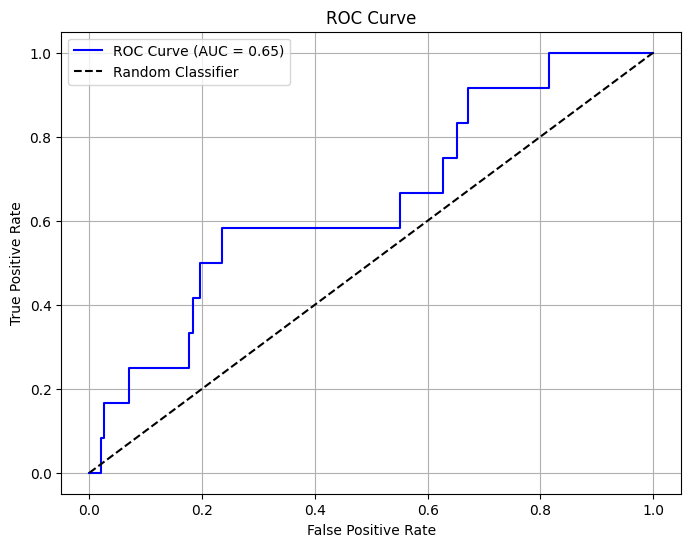

In [22]:
# Undersampling Majority Class
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Generate predictions and probabilities
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
# Initialize logistic regression model
log_reg = LogisticRegression(C=0.01, class_weight='balanced', random_state=42,
                   solver='liblinear')

# Train the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Generate predictions and probabilities
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()